In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import tree
import graphviz

## Q1 Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. Use “sklearn.model_selection” and GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:
### • Splitting criteria: gini or entropy.
### • Maximum depth of decision tree ranging from 2 to 10.
### • The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.

In [2]:
df = pd.read_csv("German Credit Data.csv")
df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
df['status'].value_counts()

0    700
1    300
Name: status, dtype: int64

In [4]:
df = pd.get_dummies(df)

In [5]:
df

,duration,amount,inst_rate,residing_since,age,num_credits,status,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A141,inst_plans_A142,inst_plans_A143,job_A171,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,42,7882,2,4,45,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
996,30,3857,4,4,40,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
997,12,804,4,4,38,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [6]:
x = df.drop(columns = 'status')
y = df['status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=743)

In [7]:
params = [{'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(2,11))}]

In [8]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 13), params, verbose = 1, cv = 10)
grid_search_cv.fit(train_x, train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=13),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=1)

In [9]:
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [10]:
grid_search_cv.best_score_

0.71375

In [11]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 564)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4, random_state=564)

In [12]:
pred_y = grid_search_cv.predict(test_x)

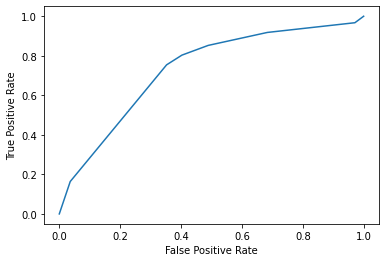

In [13]:
pred_proba_y = clf.predict_proba(test_x)[::,-1]
fpr, tpr, _ = roc_curve(test_y, pred_proba_y)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
print(roc_auc_score(test_y, pred_proba_y))

0.7304517042104022


## Q2 Visualize the tree using graphviz software
## Q3 Display the text representation of the rules learnt

[Text(0.4375, 0.9, 'X[9] <= 0.5\ngini = 0.419\nsamples = 800\nvalue = [561, 239]'),
 Text(0.20833333333333334, 0.7, 'X[0] <= 31.5\ngini = 0.486\nsamples = 493\nvalue = [288, 205]'),
 Text(0.125, 0.5, 'X[1] <= 10975.5\ngini = 0.463\nsamples = 396\nvalue = [252, 144]'),
 Text(0.08333333333333333, 0.3, 'X[0] <= 11.5\ngini = 0.455\nsamples = 388\nvalue = [252, 136]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.317\nsamples = 86\nvalue = [69, 17]'),
 Text(0.125, 0.1, 'gini = 0.478\nsamples = 302\nvalue = [183, 119]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2916666666666667, 0.5, 'X[20] <= 0.5\ngini = 0.467\nsamples = 97\nvalue = [36, 61]'),
 Text(0.25, 0.3, 'X[8] <= 0.5\ngini = 0.447\nsamples = 92\nvalue = [31, 61]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.422\nsamples = 86\nvalue = [26, 60]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),

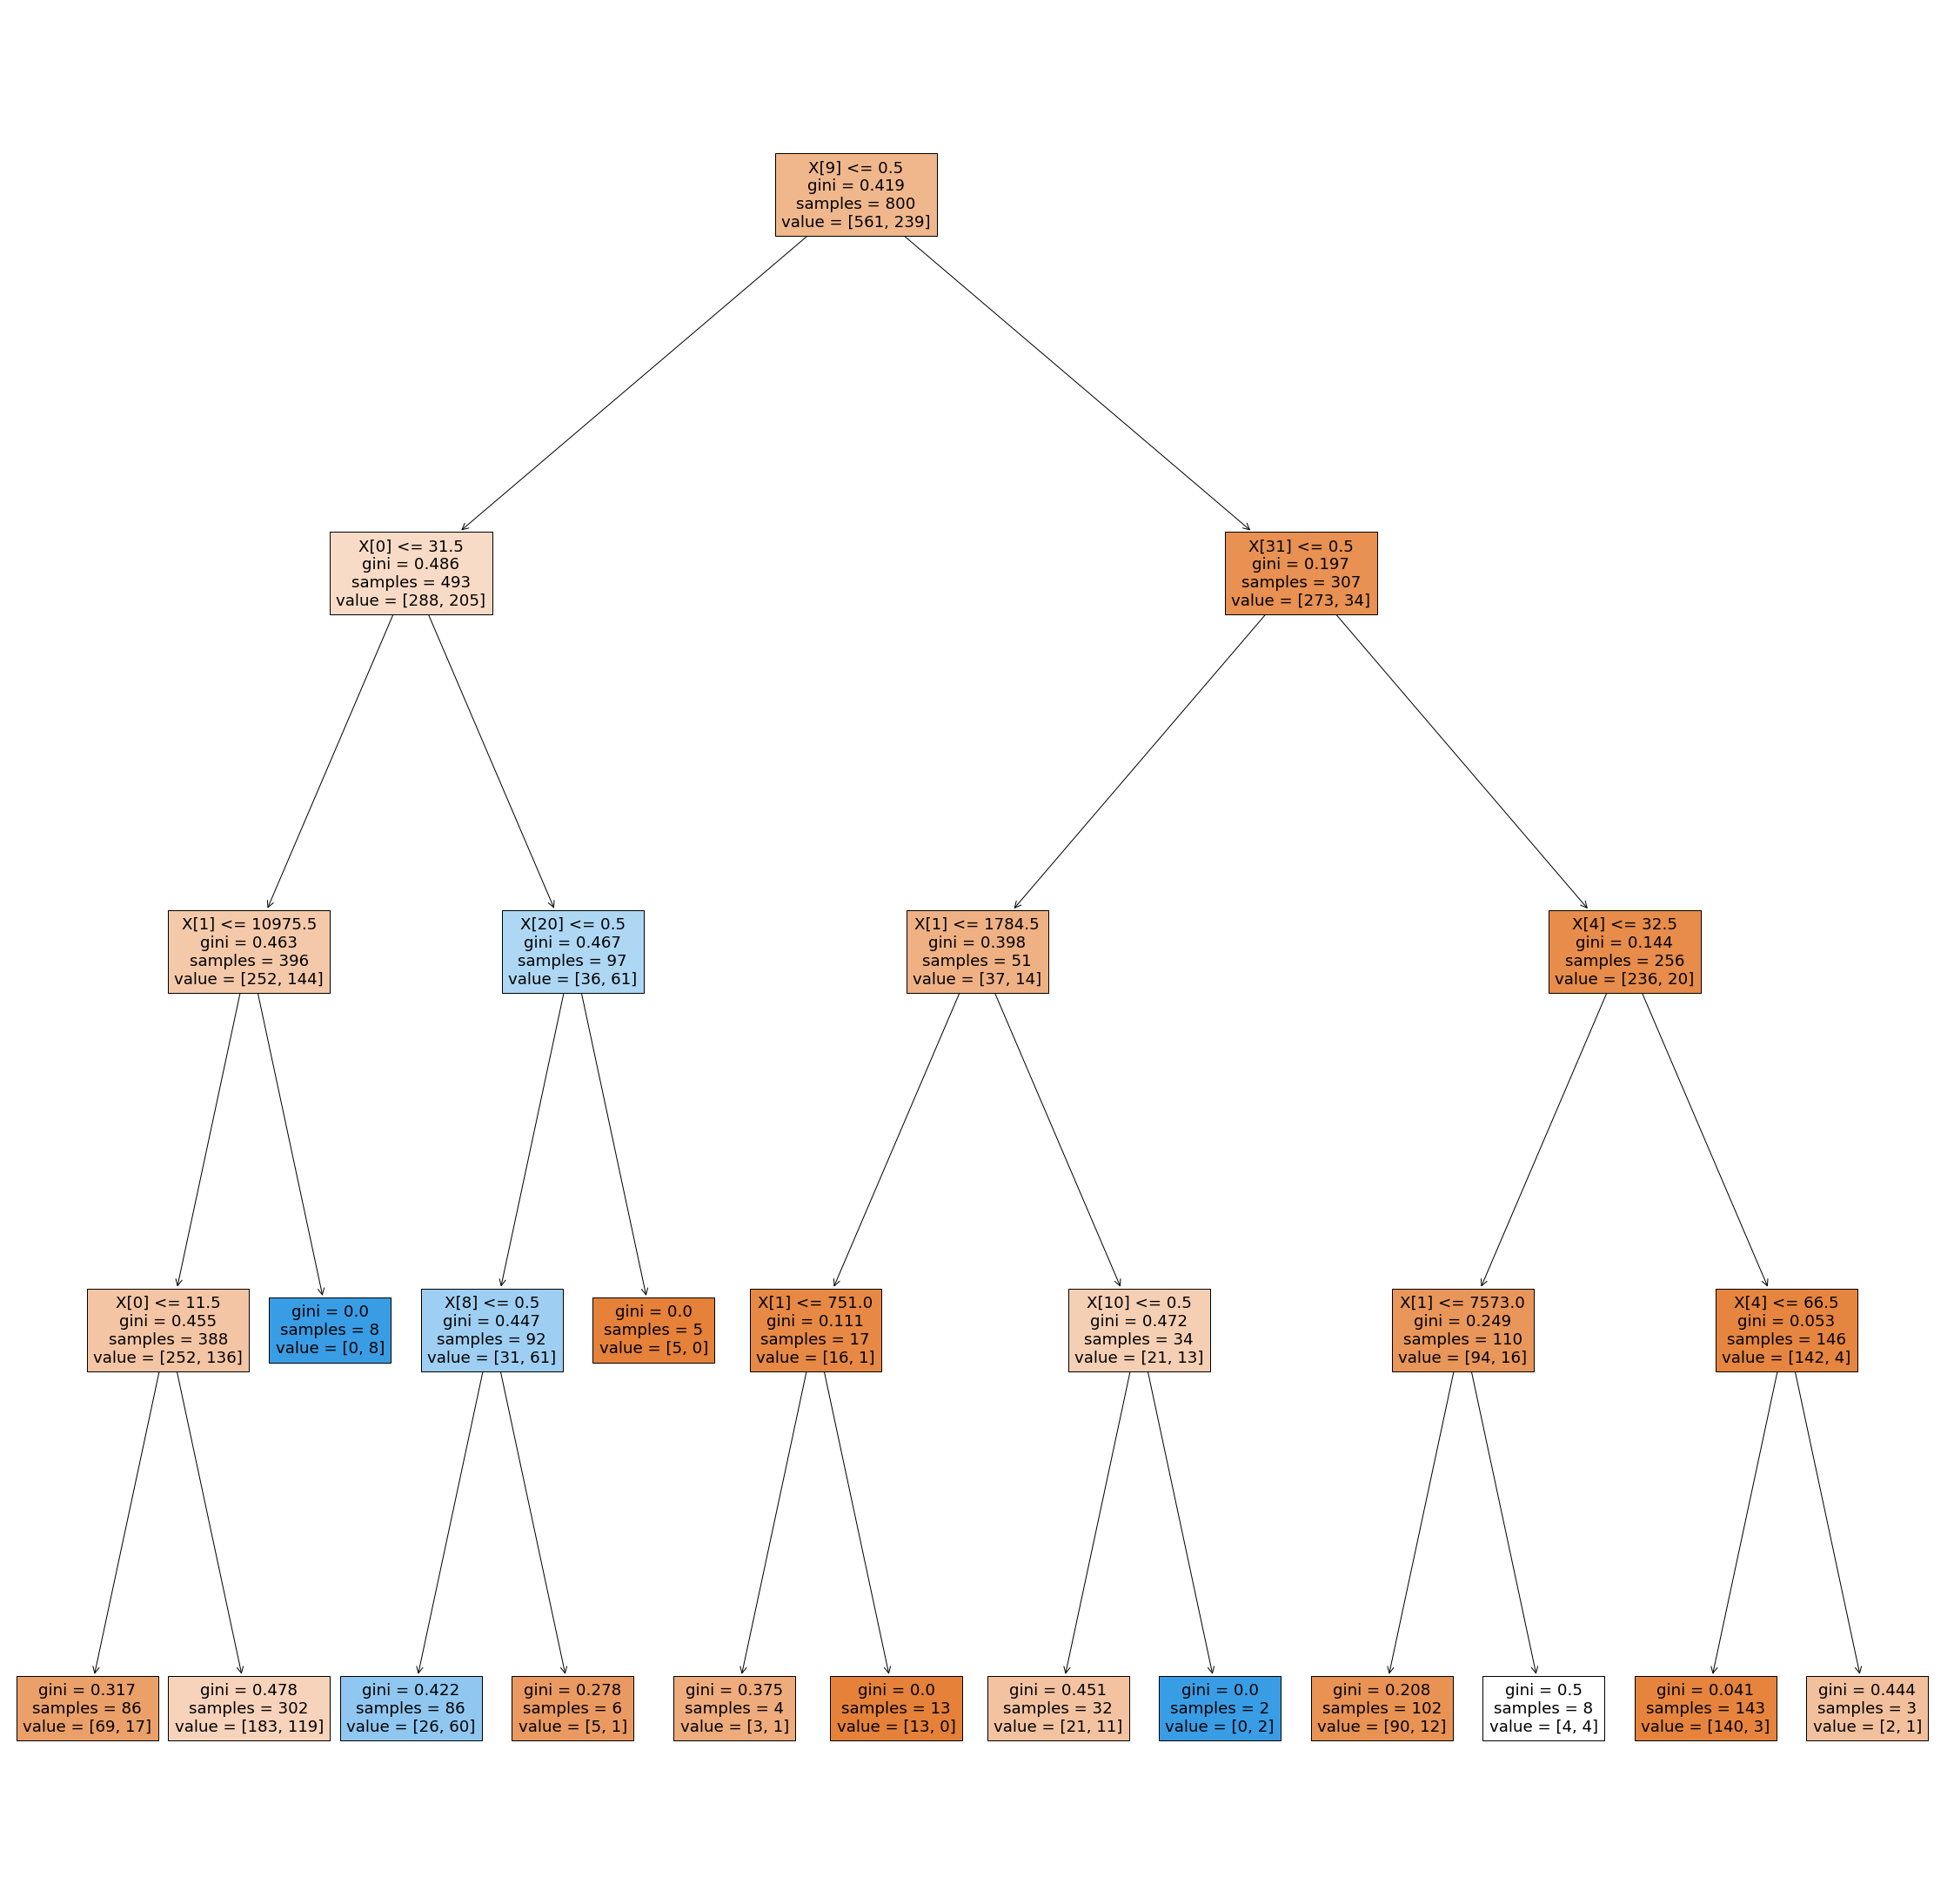

In [15]:
fig = plt.figure(figsize = (40,40))
tree.plot_tree(clf, filled = True)

In [17]:
dot_data = tree.export_graphviz(clf, out_file = 'Tree.dot', filled = True)
graph = graphviz.Source(dot_data, format = 'png')
graph

AttributeError: 'NoneType' object has no attribute 'splitlines'

In [45]:
fig.savefig('DT.png')